# Lab 1 Inroduction



This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

Let's import all the necessary packages:

In [2]:
# %matplotlib inline is a magic function for displaying the image in the notebook
%matplotlib inline
import numpy as np
import cv2 
import copy
import matplotlib.image as mpimg
from matplotlib import pyplot as plt


## Task 1. Basic loading and displaying

This is an unassessed task to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Introduction to Python Workshop](https://monashdatafluency.github.io/python-workshop-base/) github tutorial which provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint 1: images in python can be though of as a multidimentional array`
`Hint 2: Use OpenCV to load the image`

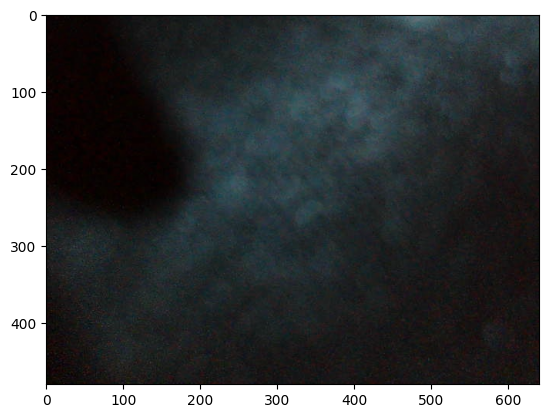

In [3]:
# fill in missing part
img = cv2.imread('captured_dataset/9c69ba35.jpg') # replace this code and load your image

# display the image (Hint: use plt.imshow)
plt.imshow(img)



Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

(480, 640, 3)


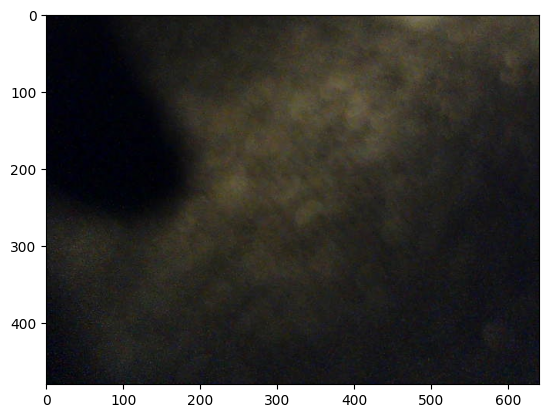

In [4]:
print(img.shape)

# Play with the images here 
b,g,r = cv2.split(img)
blue_channel = img[:,:,0]

# plt.imshow(g)
# plt.imshow(img[:,:,0])

# swap channels and display image
new_img = np.zeros_like(img)
new_img[:,:,0] = img[:,:,2]  # Swap red to blue
new_img[:,:,1] = img[:,:,1]  # Green remains the same
new_img[:,:,2] = img[:,:,0]  # Swap blue to red

plt.imshow(new_img)



### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

shape of gray_img (480, 640, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

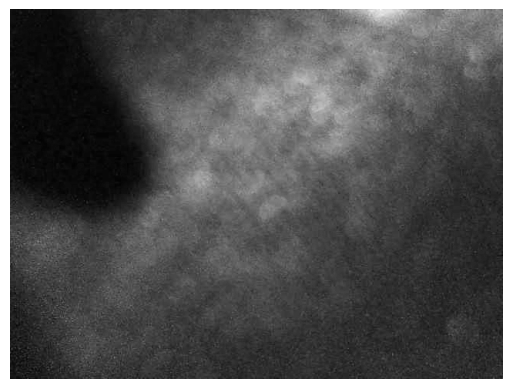

In [5]:
img = cv2.imread('captured_dataset/9c69ba35.jpg') # replace this code and load your image

# display the image (Hint: use plt.imshow)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

print(f"shape of gray_img {img.shape}")

# plt.imshow(gray_img) # Matplotlib会将灰度图像显示为伪彩色图像
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show

Try writing your own method to convert RGB images to gray scale.

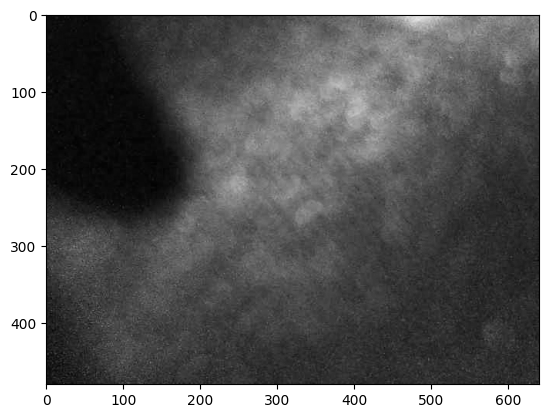

In [6]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape

    gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

img = cv2.imread('captured_dataset/9c69ba35.jpg') # replace this code and load your image

gray_img = to_gray(img=img)

plt.imshow(gray_img, cmap='gray')

##  Task 2. Basic loading and displayingMore advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

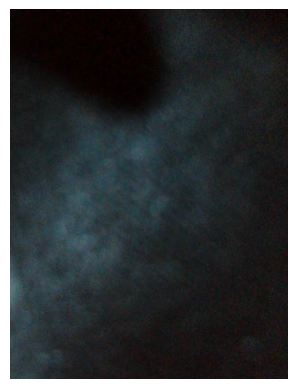

In [7]:
transposed_img = cv2.transpose(img)  # Transpose the image

# Display the transposed image
plt.imshow(transposed_img)
plt.axis('off')
plt.show()

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

`Hint: Do not use for loop, try NumPy array slicing. Be carefull of the coordinate system!`

<bound method _AxesBase.axis of <Axes: title={'center': 'forth Part'}>>

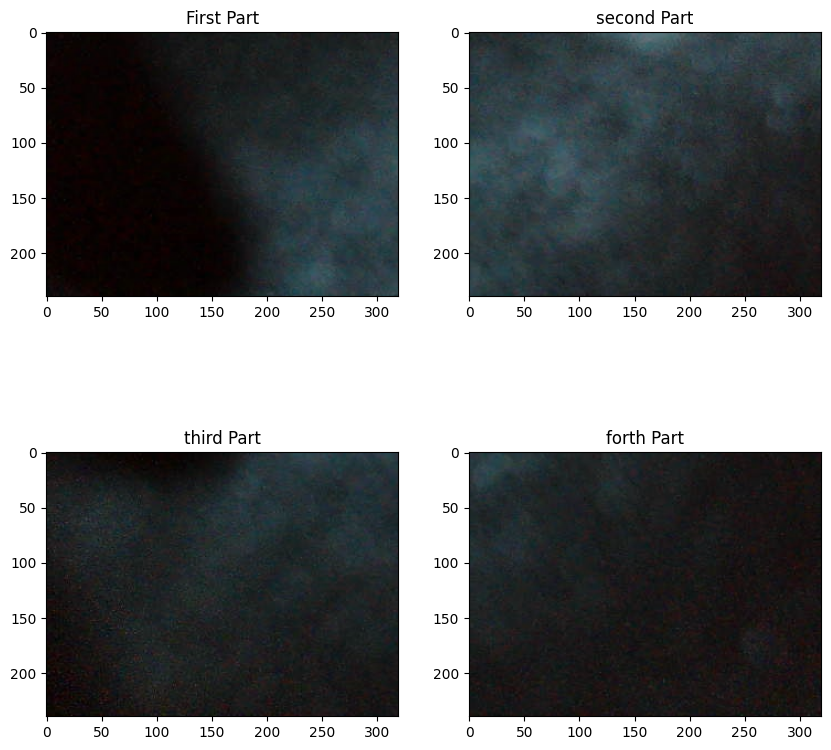

In [8]:
import numpy as np

height, width, channels = img.shape

first_part = img[:height//2, :width//2, :]
second_part = img[:height//2, width//2 : , :]
third_part = img[height//2:, :width//2, :]
fourth_part = img[height//2:, width//2:, :]

# display all parts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 显示每个部分
axs[0, 0].imshow(first_part)
axs[0, 0].set_title('First Part')
axs[0, 0].axis

axs[0, 1].imshow(second_part)
axs[0, 1].set_title('second Part')
axs[0, 1].axis

axs[1, 0].imshow(third_part)
axs[1, 0].set_title('third Part')
axs[1, 0].axis

axs[1, 1].imshow(fourth_part)
axs[1, 1].set_title('forth Part')
axs[1, 1].axis



## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

shape of original img: (480, 640, 3)
shape of scaled img: (240, 320, 3)


(np.float64(-0.5), np.float64(319.5), np.float64(239.5), np.float64(-0.5))

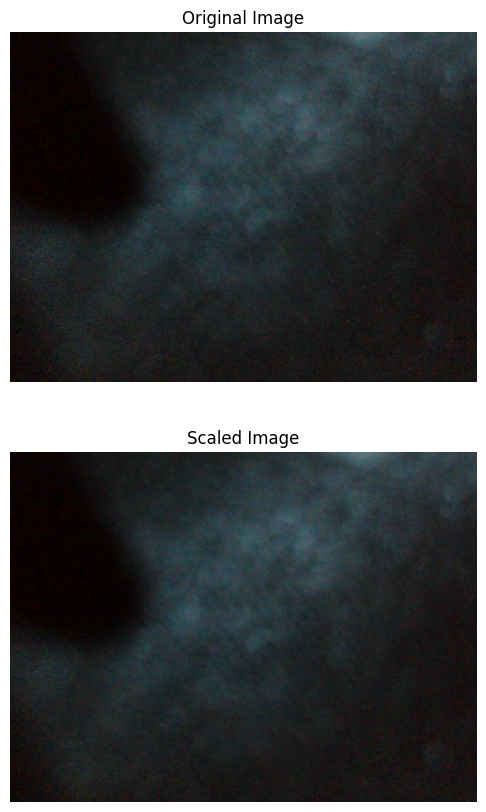

In [9]:
def scale_down(img):
    # acquire shape of original image
    height, width, channels = img.shape 
    print(f"shape of original img: {img.shape}")


    # initiate a new np array to store scaled image
    scaled_height = height // 2
    scaled_width = width // 2
    scaled_img = np.zeros((scaled_height, scaled_width, channels), dtype=img.dtype)

    # compute average of four pixels
    for i in range(scaled_height):
        for j in range(scaled_width):
            for k in range(channels):
                scaled_img[i,j,k] = np.mean(img[2*i:2*i+2, 2*j:2*j+2, k])

    return scaled_img

scaled_img = scale_down(img) 

print(f"shape of scaled img: {scaled_img.shape}")

fig, axes = plt.subplots(2,1, figsize=(10, 10))

# display original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# display scaled down image
axes[1].imshow(scaled_img)
axes[1].set_title('Scaled Image')
axes[1].axis('off')



In [10]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    scaled_img = img # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img


def double_size(img):
    # 获取原始图像的形状
    height, width, channels = img.shape

    # 创建一个新的数组来存储放大后的图像
    doubled_height = height * 2
    doubled_width = width * 2
    doubled_img = np.zeros((doubled_height, doubled_width, channels), dtype=img.dtype)

    # 使用最近邻插值法将图像大小加倍
    for i in range(doubled_height):
        for j in range(doubled_width):
            for k in range(channels):
                doubled_img[i, j, k] = img[i // 2, j // 2, k]

    return doubled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

In [11]:
# doubled_img = np.repeat(np.repeat(img, 2, axis=0), 2, axis=1)

##  Task 3: Image Histograms


In [12]:
import numpy as np
import copy
import cv2
import matplotlib
from matplotlib import pyplot as plt
import random
import copy
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('fivethirtyeight')

### 3.1: Compute Histogram
Histograms can be rather important when it comes to adjusting the brightness of an image.
Your first task is to compute a histogram of an image of your choice and display this as a plot.

*Note: Do not use any libraries, write your own function*

In [13]:
def compute_hist(img):
    '''
    Implement 
    :param img: gray scaled image with size HxW
    :return histogram array: 
    '''

    '''
    hint: use np.count_nonzero
    '''
    histogram = [0] * 256  # 直方图的范围应该是 256
    height, width = img.shape
    print(f"shape of image: H={height} W={width}")

    for i in range(height):
        for j in range(width):
            pixel_value = img[i, j]
            histogram[pixel_value] += 1

    return histogram


##  test
# zeros_array = np.zeros((3, 4))
# ones_array = np.array([[1,1,1],
#                        [2,3,4]])
# print(f"original {ones_array}")
# hist = compute_hist(ones_array)

# print(f"Histogram: {hist}")

 

shape of image: H=512 W=512


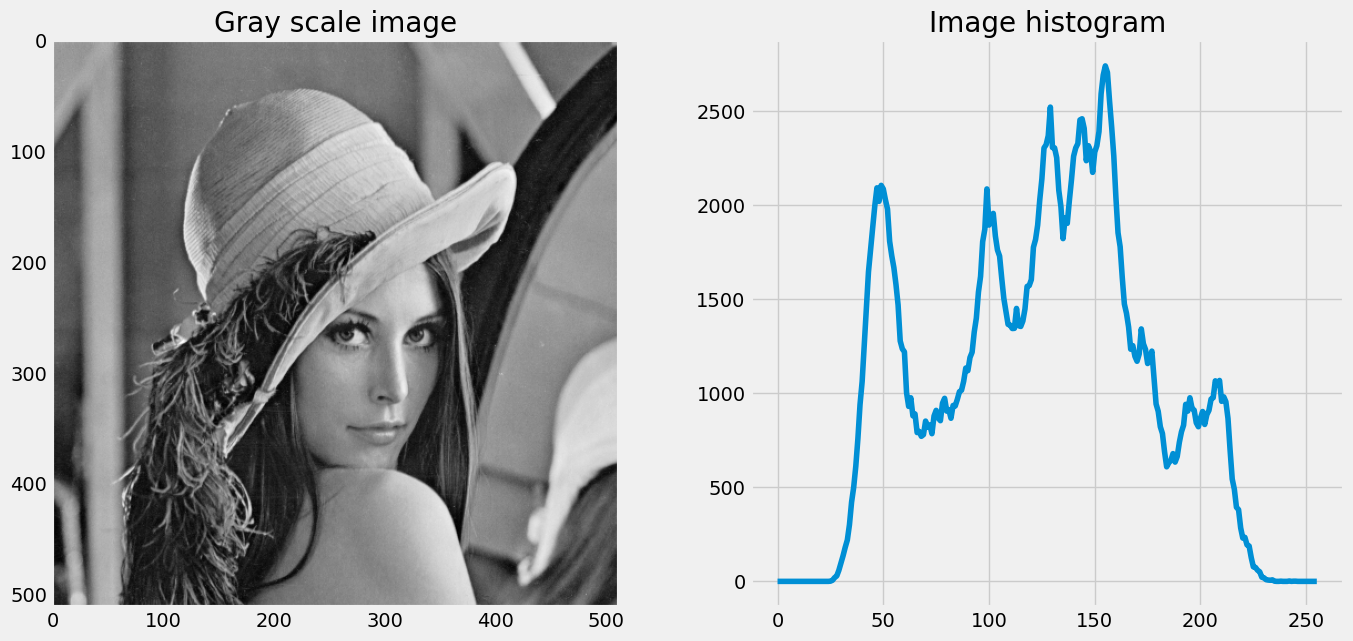

In [14]:
img = cv2.imread('../dataset/Lenna.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

shape of image: H=813 W=703


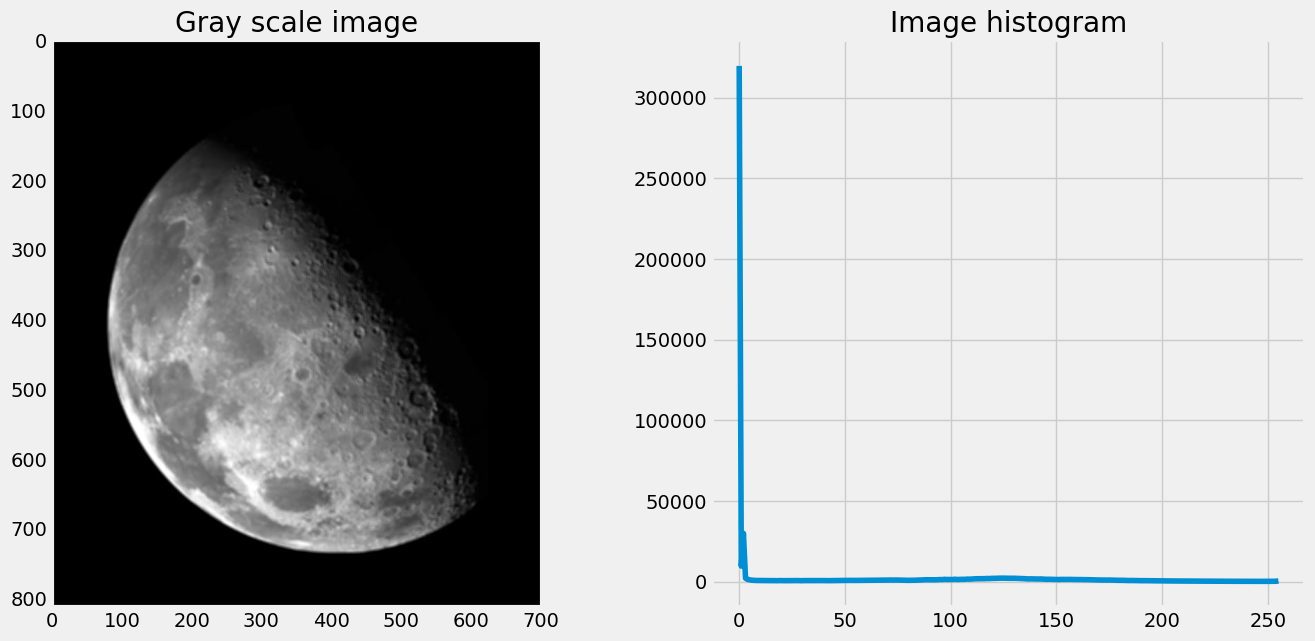

In [15]:
img = cv2.imread('../dataset/moon.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

Why is there such a differece between Lenna and Moon on the histogram?

## Task 4: Histogram Equalisation
Histogram Equalisation is often used to adjust the global contrast of an image.
It is most useful when an image’s background is either too dark or too light and can bring out more detail in under exposed images.

This can be done by finding a mapping function $F: [0, 255] \rightarrow [0, 255]$:

$$
    F(v) = \frac{cdf(v) - cdf_{min}}{(M \times N) - cdf_{min}}\times(L - 1)
$$

Where $v$ is the current value to be adjusted, $(M \times N)$ is the size of the image and $L$ is the number of intensity levels i.e. 256. The cdf is the cumulative distribution of the histogram.

**Hint: this is essentially equivalent to do histgram mathcing with a source CDF as straight line.**

Your task would be to calculate the new mappings, apply this to the image and plot the new equalised histogram. As shown below:

In [16]:
def hist_equalisation(img, img_hist):
    '''
    Implement 
    :param img: gray scaled image with size HxW
    :param img_hist: [256,]
    :return: image segmentation of size HxW
    '''

    '''
    hint: use np.cumsum
    '''
    L = 256
    cdf = np.cumsum(img_hist) 
    cdf_min = np.min(cdf[np.nonzero(cdf)]) # find minimal value in cdf except for zero

    print(f"cdf_min is: {cdf_min}")

    height, width = img.shape

    F = np.zeros_like(cdf)
    
    # compute new equlised CDF
    for i in range(256):
        F[i] = int((cdf[i] - cdf_min) / (height*width - cdf_min) * (L - 1))
        
    print(f"F is :{F}")  # so: F is just a mapping ==> it is NOT a CDF of img
    
    # restore equalised img using F[i]
    equalised_img = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            equalised_img[i, j] = F[img[i, j]]  # important: equlization in range [0,255]

    return equalised_img, F


cdf_min is: 319669
F is :[  0   9  39  41  43  44  45  45  46  47  47  48  49  49  50  50  51  51
  52  52  53  54  54  55  55  56  56  57  57  58  59  59  60  60  61  62
  62  63  63  64  65  65  66  66  67  67  68  69  69  70  71  71  72  73
  73  74  75  75  76  77  78  79  79  80  81  82  83  83  84  85  86  87
  88  89  90  91  91  92  93  94  94  95  96  97  98  99  99 100 102 103
 104 105 106 107 108 109 110 112 113 114 116 117 118 120 121 122 124 125
 126 128 130 131 133 135 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 179 181 183 184 186 187 189 190
 192 193 195 196 197 199 200 201 202 204 205 206 208 209 210 211 213 214
 215 216 217 219 220 221 222 223 224 225 226 227 227 228 229 230 231 232
 232 233 234 234 235 236 236 237 237 238 239 239 240 240 241 241 242 242
 243 243 243 244 244 245 245 245 246 246 246 247 247 247 247 248 248 248
 248 249 249 249 249 249 250 250 250 250 250 251 251 251 251 251 251 252
 252 252 252 252 252 252 2

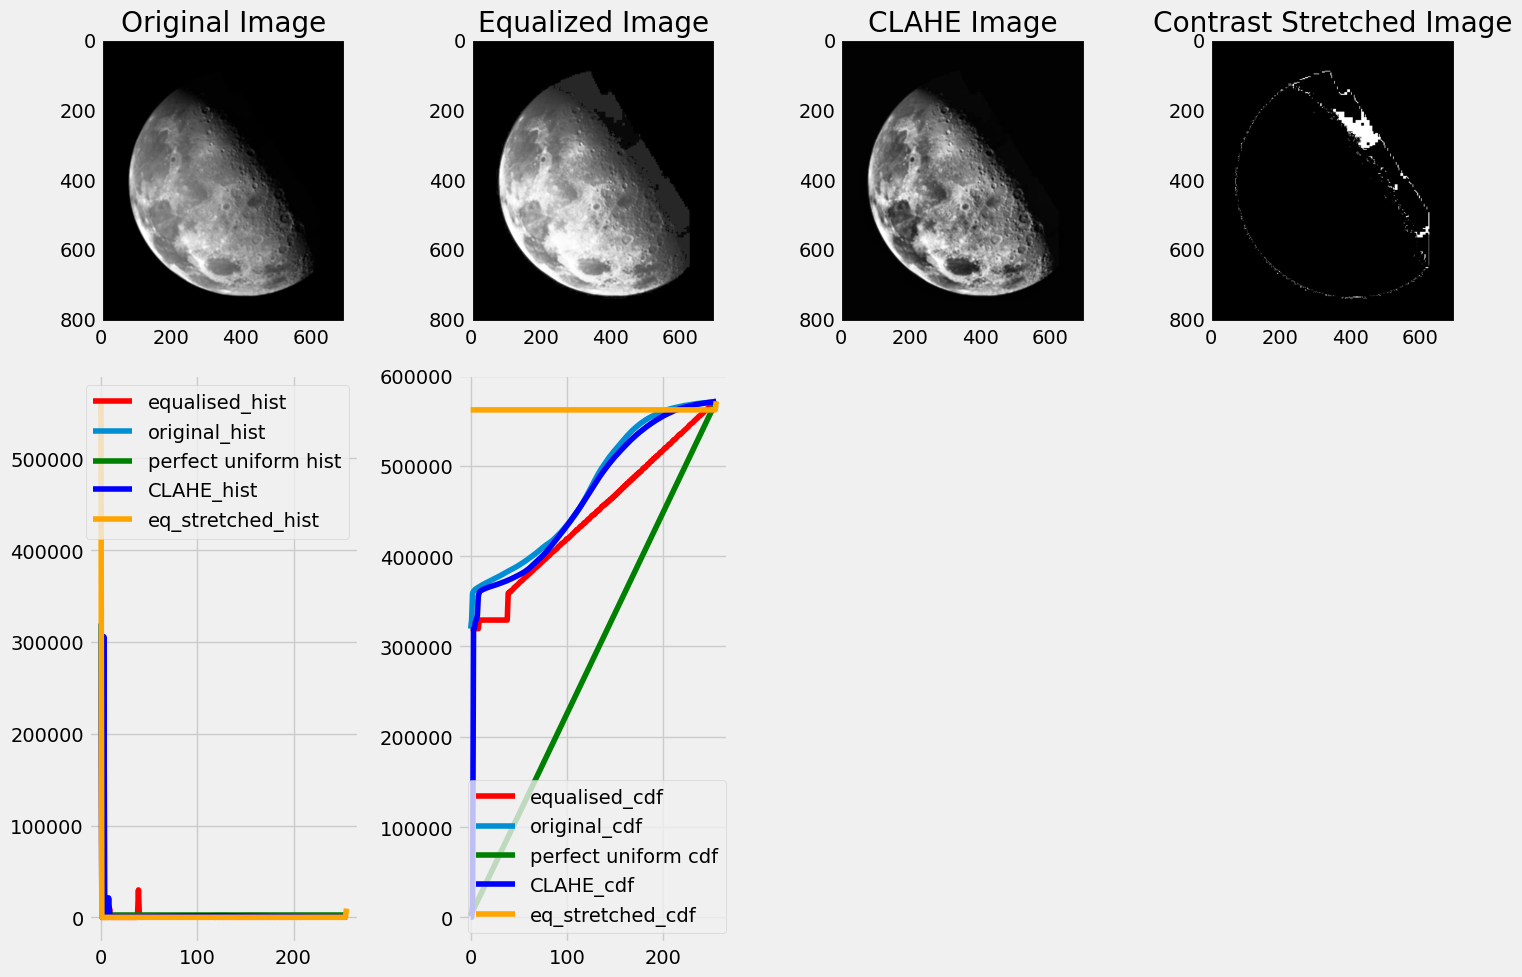

In [17]:
img_cdf = np.cumsum(img_hist)
h, w = gray_img.shape
uni_hist = np.ones(256,) * h * w / 256
uni_cdf = np.cumsum(uni_hist)
eqImg, F = hist_equalisation(gray_img, img_hist)
eqImg_hist = compute_hist(eqImg.astype(int))
eqImg_cdf = np.cumsum(eqImg_hist)

# Advanced Method: CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
CLAHE_img = clahe.apply(gray_img)
CLAHE_img_hist = compute_hist(CLAHE_img.astype(int))
CLAHE_img_cdf = np.cumsum(CLAHE_img_hist)

# Advanced Method 2: Contrast Stretching
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_img = (image - min_val) * 255 / (max_val - min_val)
    return stretched_img.astype(np.uint8)

stretched_img = contrast_stretching(gray_img)
# equalisation of stretched image
eq_stretched_img, _ = hist_equalisation(stretched_img, compute_hist(stretched_img))
eq_stretched_img_hist = compute_hist(eq_stretched_img.astype(int))
eq_stretched_img_cdf = np.cumsum(eq_stretched_img_hist)

## end of method 2 ## 

# print(f"eqImg_cdf is: {eqImg_cdf}")

# Plot Original and Equalised image
fig, axes = plt.subplots(2, 4, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 2]})

axes[0, 0].imshow(gray_img, 'gray')
axes[0, 0].grid(False)
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(eqImg, 'gray')
axes[0, 1].grid(False)
axes[0, 1].set_title('Equalized Image')

axes[0, 2].imshow(CLAHE_img, 'gray')
axes[0, 2].grid(False)
axes[0, 2].set_title('CLAHE Image')

axes[0, 3].imshow(stretched_img, 'gray')
axes[0, 3].grid(False)
axes[0, 3].set_title('Contrast Stretched Image')

axes[1, 0].plot(eqImg_hist, color='red', label='equalised_hist')
axes[1, 0].plot(img_hist, label='original_hist')
axes[1, 0].plot(uni_hist, color="green", label='perfect uniform hist')
axes[1, 0].plot(CLAHE_img_hist, color='blue', label='CLAHE_hist')
axes[1, 0].plot(eq_stretched_img_hist, color='orange', label='eq_stretched_hist')
axes[1, 0].legend()

axes[1, 1].plot(eqImg_cdf, color="red", label="equalised_cdf")
axes[1, 1].plot(img_cdf, label="original_cdf")
axes[1, 1].plot(uni_cdf, color="green", label='perfect uniform cdf')
axes[1, 1].plot(CLAHE_img_cdf, color='blue', label='CLAHE_cdf')
axes[1, 1].plot(eq_stretched_img_cdf, color='orange', label='eq_stretched_cdf')
axes[1, 1].legend()

# Remove unused subplots
for ax in axes[1, 2:]:
    fig.delaxes(ax)



plt.tight_layout()
plt.show()

## Task 5: Histogram Matching

Your next task is to be able to adjust an image based on the histogram of another.
This is done using histogram matching and can be helpful if you would like to adjust a series of images with different global illuminations. Using histogram matching you could adjust this image’s brightness (and contrast) to match the other better illuminated images.

To perform histogram matching we need to first calculate the normalised CDF of the **source image** and the **target image**: `cdfSource` and `cdfTarget`.

The normalised CDF for each image is obtained by dividing the value in each bin of the original CDF with the maximum value of the original CDF (last bin of the original CDF), so we get a value between 0 and 1 in each bin of the normalised CDF.

We then need to find a mapping function `F` that maps `cdfSource` to `cdfTarget`. This mapping function can then be applied to the input image. The mapping function needed is quite simple and can be obtained by comparing the values between cdfSource and cdfTarget. One way to do this, is to find the first `cdfSource(valueS)` that is greater than `cdfTarget(valueT)`, and that valueT will be the mapping `F(valueS)`. The figure below is a demonstration on how this mapping function works:

<img src="../images/histogram-cdf.png" alt="drawing" width="700"/>

In [18]:
def hist_match(source_img, target_img):
    '''
    Impelemnt 
    :param source_img: gray scaled image with size HxW
    :param target_img: 
    :return: image 
    '''
    # Flatten the images
    source_flat = source_img.ravel()
    target_flat = target_img.ravel() #?

    # histogram
    hist_source, _ = np.histogram(source_flat, 256, [0,256])
    hist_target, _ = np.histogram(target_flat, 256, [0,256])

    # cdf of source image and target image
    cdf_source = np.cumsum(hist_source)
    cdf_target = np.cumsum(hist_target)

    # Normalize CDFs to [0, 1]
    cdf_source = cdf_source / cdf_source[-1]
    cdf_target = cdf_target / cdf_target[-1]

    F = np.zeros_like(cdf_target,dtype=np.uint8)
    for i in range(256):
        # the idx ==> brightness (intensity) of pixel 
        # the f(idx) ==> normalized "cumulated number" of pixels 
        # find first source norm_cdf value larger than norm_target value
        # why........................... QAQ .........................
        
        for j in range(256):
            if cdf_source[j] <= cdf_target[i]:
                continue
            else:
                F[i] = j
                break

    
    matched_flat = F[source_flat]
    matched_img = matched_flat.reshape(source_img.shape)        

    return matched_img, hist_source, hist_target


shape of image: H=500 W=333


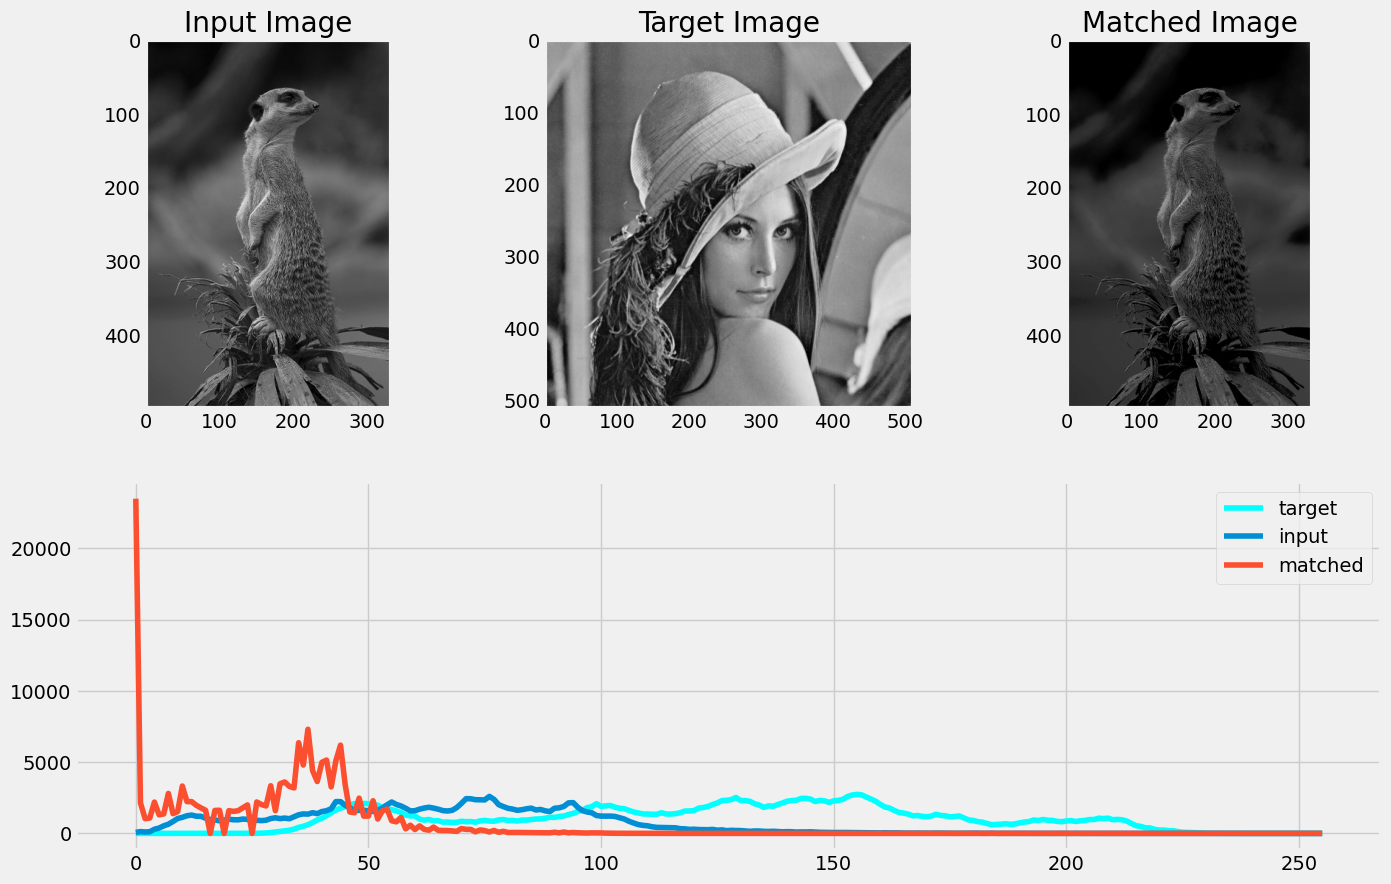

In [19]:
src_img = cv2.imread('../dataset/meerkat.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = cv2.imread('../dataset/Lenna.png')
tgt_img = cv2.cvtColor(tgt_img, cv2.COLOR_BGR2GRAY)
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(tgt_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()

# Task 6 Try with your webcam!
Capture some real image with your laptop webcam or other usb cameras and match their historgrams.
Try capture images under different ligthing conditions.

In [20]:
import uuid
import os

Webcam 0 opened. Press 'q' in the preview window to capture and save the image.
Image saved to captured_dataset/97e09a12.jpg


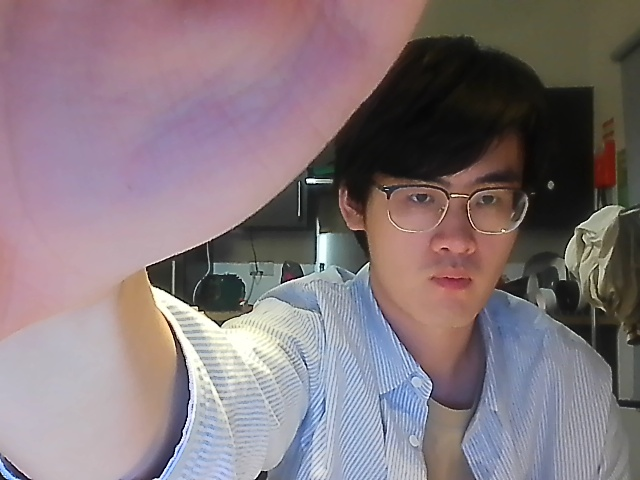

In [26]:
from IPython.display import display, Image


# Function to capture and preview an image from a webcam
def capture_webcam_image(cam_index=0, save_folder="captured_dataset"):
    # Ensure the save folder exists
    os.makedirs(save_folder, exist_ok=True)
    
    # Generate a short UUID for the filename
    short_uuid = str(uuid.uuid4())[:8]
    save_path = os.path.join(save_folder, f"{short_uuid}.jpg")
    
    # Open the webcam with the specified index
    cap = cv2.VideoCapture(cam_index)
    
    if not cap.isOpened():
        print(f"Cannot open webcam with index {cam_index}")
        return
    
    print(f"Webcam {cam_index} opened. Press 'q' in the preview window to capture and save the image.")
    
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image.")
            break
        
        # Display the frame in a preview window
        cv2.imshow("Webcam Preview", frame)
        
        # Wait for the user to press 'q' to capture
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Save the captured image
            cv2.imwrite(save_path, frame)
            print(f"Image saved to {save_path}")
            break

    # Release the webcam and close the window
    cap.release()
    cv2.destroyAllWindows()



    
    # Display the saved image in the Jupyter Notebook
    with open(save_path, "rb") as file:
        display(Image(data=file.read()))

        
    return short_uuid, save_path
# Call the function to preview and capture an image
short_uuid, save_path = capture_webcam_image(cam_index=0, save_folder="captured_dataset")


Image successfully read from captured_dataset/97e09a12.jpg
shape of image: H=480 W=640


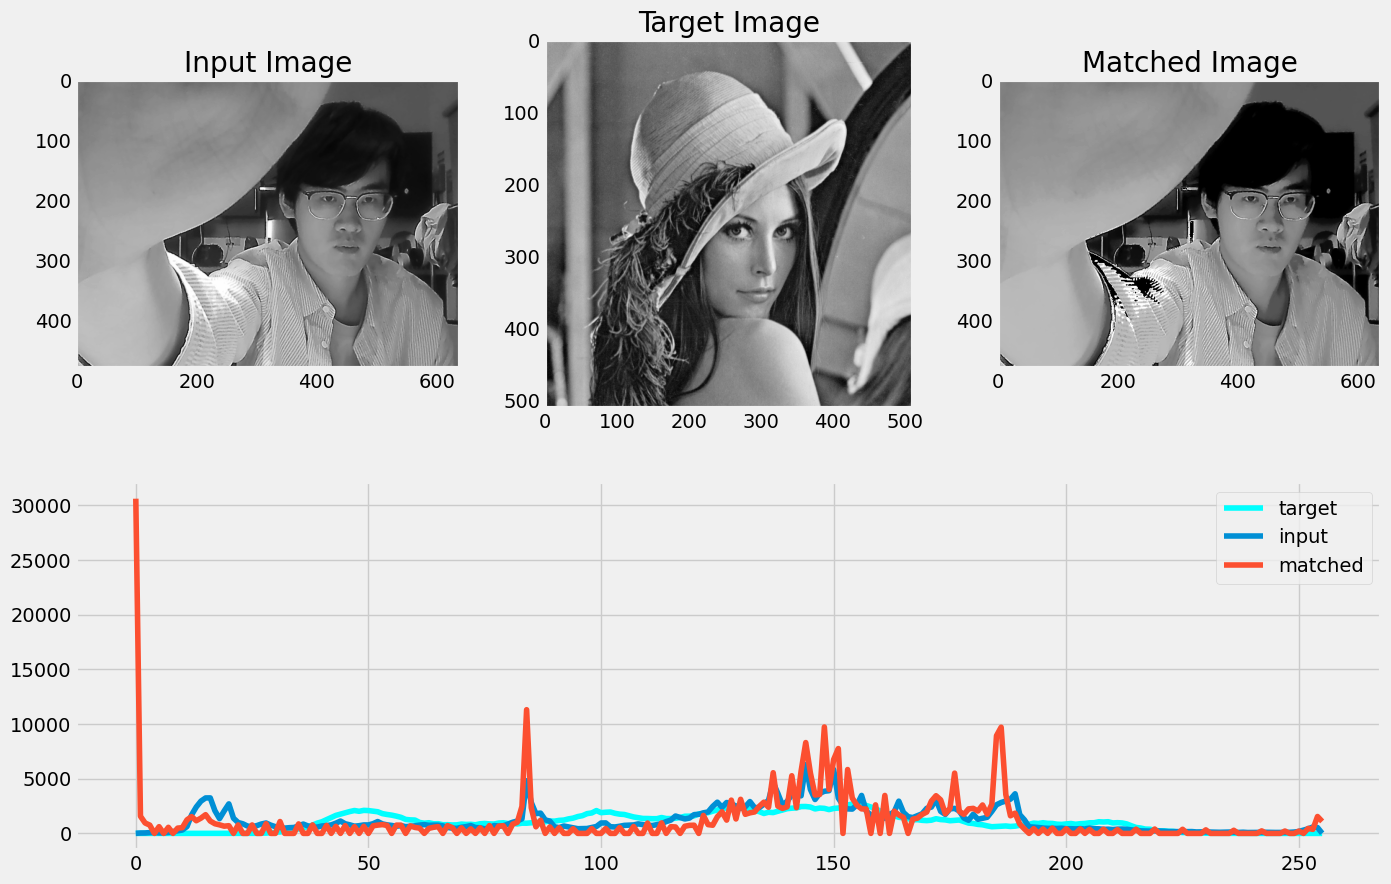

In [27]:
if short_uuid:
    src_img = cv2.imread(save_path)
    if src_img is not None:
        print(f"Image successfully read from {save_path}")
    else:
        print("Failed to read the saved image.")


# src_img = cv2.imread('./captured_dataset/9c69ba35.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = cv2.imread('../dataset/Lenna.png')
tgt_img = cv2.cvtColor(tgt_img, cv2.COLOR_BGR2GRAY)
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(tgt_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()